# Southeast Exploratory Data Analysis
by Adriana Machado 07/03/2021

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# function to plot a correlation

def correlation_plot(x,y):
    # correlation plot
    corr = plt.scatter(x, y)
  
    # This will fit the best line into the graph
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)));
    return corr

In [6]:
# import southeast df
se_df = pd.read_csv("data/se_df.csv")
se_df.columns

Index(['city', 'state', 'region', 'pop_size range', 'diversity score',
       'pop_est', 'white  (%)', 'black  (%)', 'asian  (%)', 'hisp_lat  (%)',
       'gross metro product (  billions)',
       'casual gain or loss in income (%)  ', 'unemployment rate (%)',
       'unemployed white (%)', 'unemployed black (%)', 'unemployed asian (%)',
       'unemployed latino (%)', 'living wage ( $)',
       'asian med income ( $) state', 'black med income ( $) state',
       'hispanic med income ( $) state', 'white med income ($) state',
       'black median wage  ($) city', 'white  median wage ($) city',
       'latino median wage  ($) city', 'asian median wage  ($) city',
       'blacks with ba degree or higher (%)',
       'whites with ba degree or higher (%)',
       'latinos with ba degree or higher (%)',
       'asians with ba degree or higher (%)',
       '2017 graduation rate for local schools (%)',
       'graduation rate: asian (%)', 'graduation rate: black (%)',
       'graduation rate

In [7]:
# sort se_df by population size estimate

se_df = se_df.sort_values(by=['pop_est'], ascending = False)
se_df

,city,state,region,pop_size range,diversity score,pop_est,white (%),black (%),asian (%),hisp_lat (%),gross metro product ( billions),casual gain or loss in income (%),unemployment rate (%),unemployed white (%),unemployed black (%),unemployed asian (%),unemployed latino (%),living wage ( $),asian med income ( $) state,black med income ( $) state,hispanic med income ( $) state,white med income ($) state,black median wage ($) city,white median wage ($) city,latino median wage ($) city,asian median wage ($) city,blacks with ba degree or higher (%),whites with ba degree or higher (%),latinos with ba degree or higher (%),asians with ba degree or higher (%),2017 graduation rate for local schools (%),graduation rate: asian (%),graduation rate: black (%),graduation rate: hispanic (%),graduation rate: white (%),victims of hate crimes,state congress party majority,mayoral political party,governor political party
2,jacksonville,florida,southeast,"500k-999,999",52.4,911507,0.512,0.310,0.048,0.100,0.812,-0.026,0.044,0.05,0.10,0.04,0.06,13.48,72205,41702,49266,61682,16.07,21.04,15.54,21.82,0.18,0.33,0.24,0.52,0.94,0.83,0.94,0.88,0.88,4,republican,republican,republican
1,charlotte,north carolina,southeast,"500k-999,999",58.9,885708,0.415,0.352,0.065,0.143,1.502,-0.144,0.044,0.04,0.10,0.05,0.06,15.49,84513,39108,42397,62036,16.59,27.87,12.52,25.46,0.26,0.63,0.15,0.56,0.86,0.84,0.86,0.78,0.82,0,republican,democrat,democratic
5,nashville,tennessee,southeast,"500k-999,999",52.3,670820,0.554,0.276,0.037,0.105,1.317,-0.055,0.041,0.03,0.06,0.03,0.03,14.78,76677,38791,43885,57216,16.07,21.36,12.57,19.18,0.27,0.50,0.13,0.51,0.75,0.87,0.74,0.68,0.73,3,republican,democrat,republican
4,memphis,tennessee,southeast,"500k-999,999",40.8,651073,0.257,0.641,0.017,0.072,0.656,-0.116,0.066,0.04,0.12,0.03,0.05,13.26,76677,38791,43885,57216,15.07,22.71,11.17,20.88,0.15,0.48,0.08,0.56,0.71,0.76,0.72,0.65,0.67,4,republican,democrat,republican
3,louisville,kentucky,southeast,"500k-999,999",40.0,617638,0.656,0.236,0.027,0.056,0.600,-0.017,0.039,0.04,0.12,0.04,0.05,14.11,64044,36424,43804,52387,16.19,21.49,14.58,20.40,0.16,0.36,0.25,0.48,0.87,0.79,0.87,0.78,0.86,4,republican,democrat,democratic
0,atlanta,georgia,southeast,"500k-999,999",46.8,506811,0.383,0.510,0.044,0.043,3.877,-0.081,0.039,0.03,0.13,0.02,0.05,16.56,80977,44670,49897,67955,16.71,30.66,18.65,31.18,0.24,0.78,0.43,0.85,0.82,0.82,0.83,0.74,0.86,0,democrat,democrat,republican


# Population

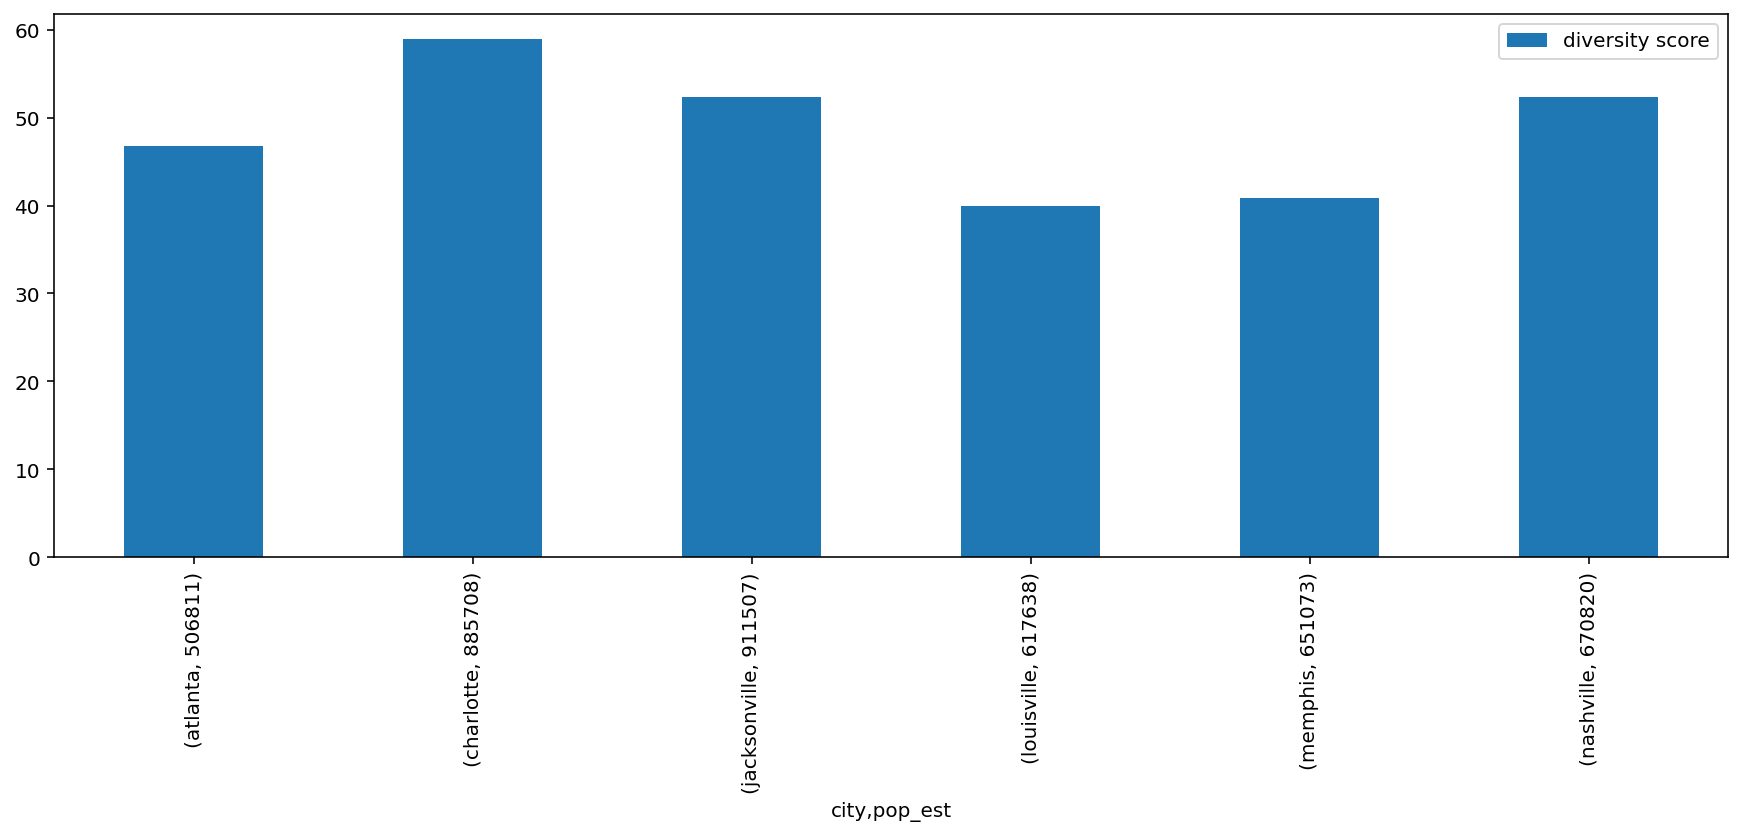

In [8]:
# bar plot of diversity score
div_plot = se_df.groupby(["city","pop_est"])[[
    "diversity score"
]].sum()
div_plot.plot.bar(figsize = (15,5));

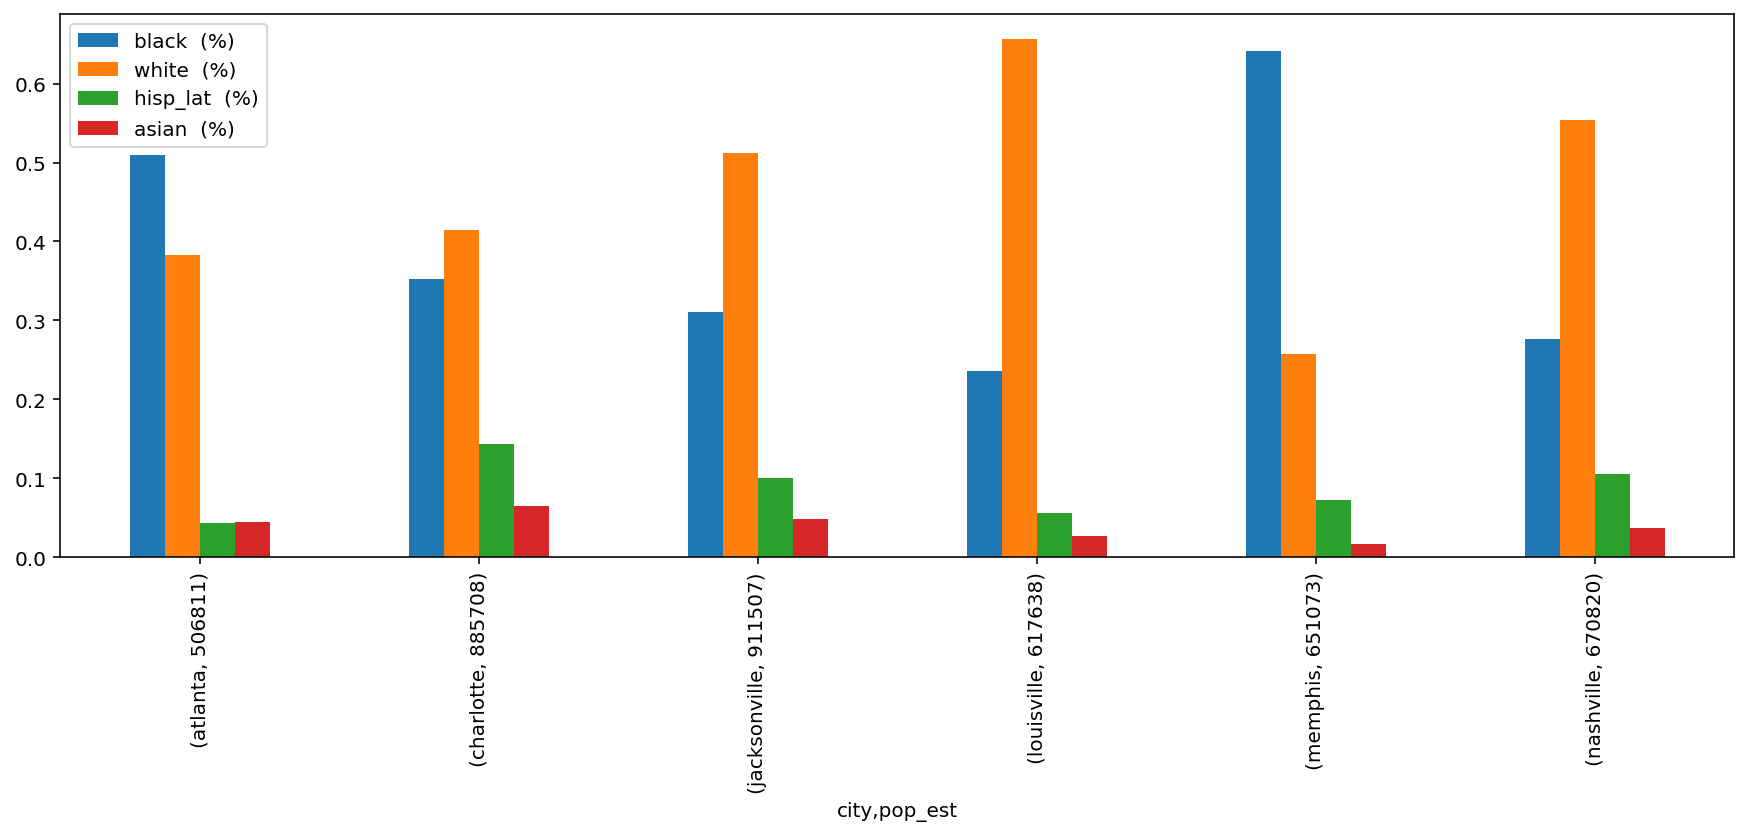

In [9]:
# bar plot of each white, black, asian, and hispanic latin population percentage
dem_plot = se_df.groupby(["city","pop_est"])[[
     "black  (%)","white  (%)", "hisp_lat  (%)", "asian  (%)"
]].sum()
dem_plot.plot.bar(figsize = (15,5));

# Unemployment

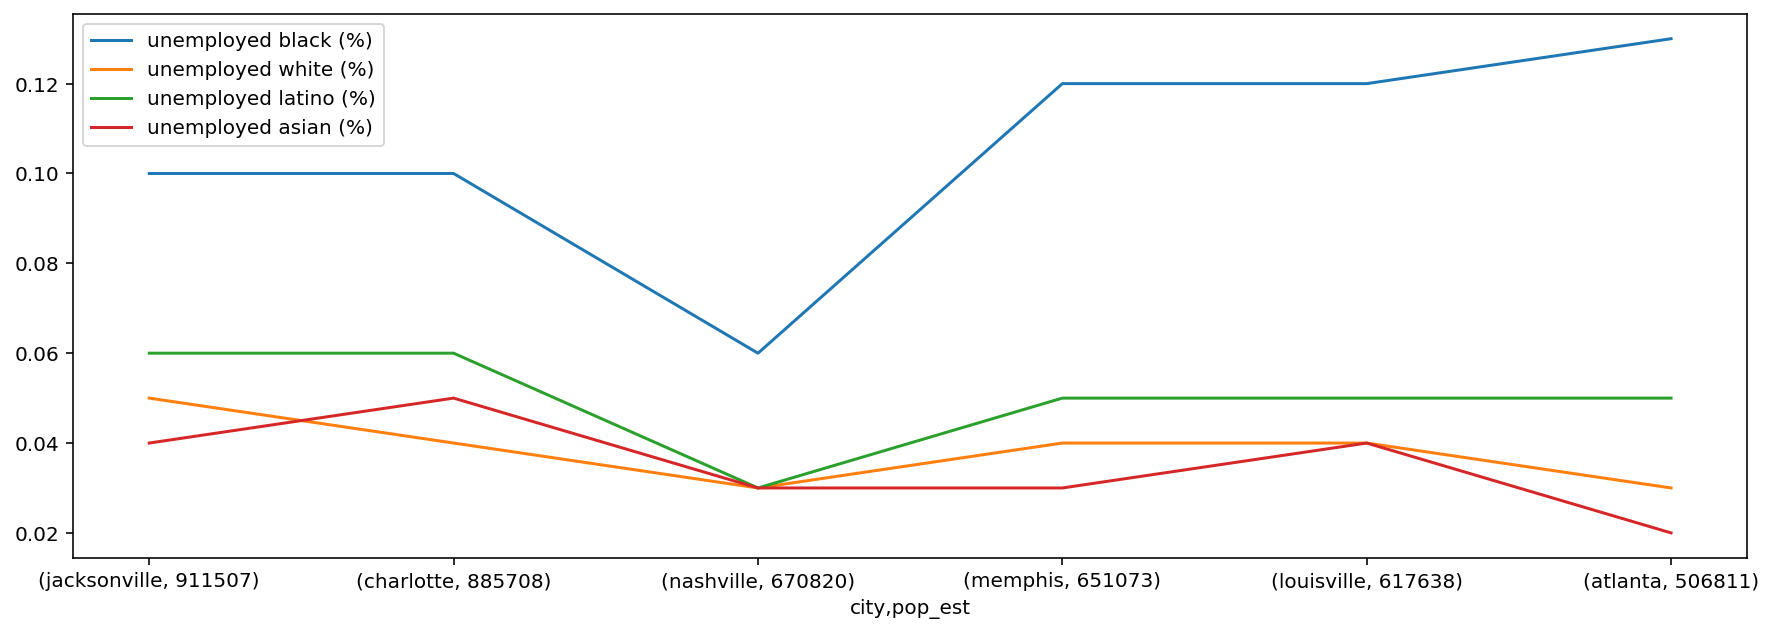

In [10]:
# plot of unemployment percentages

unemp_plot = se_df.groupby(["city","pop_est"])[[
    'unemployed black (%)', 'unemployed white (%)', 
       'unemployed latino (%)','unemployed asian (%)' 
]].sum().sort_values(by = "pop_est", ascending = False)
unemp_plot.plot(figsize = (15,5));

In [11]:
# correlation of population percentage and unemployment

black_unemp_pop_corr = se_df[['unemployed black (%)',"black  (%)"]].corr()
black_unemp_pop_corr

,unemployed black (%),black (%)
unemployed black (%),1.000000,0.519209
black (%),0.519209,1.000000


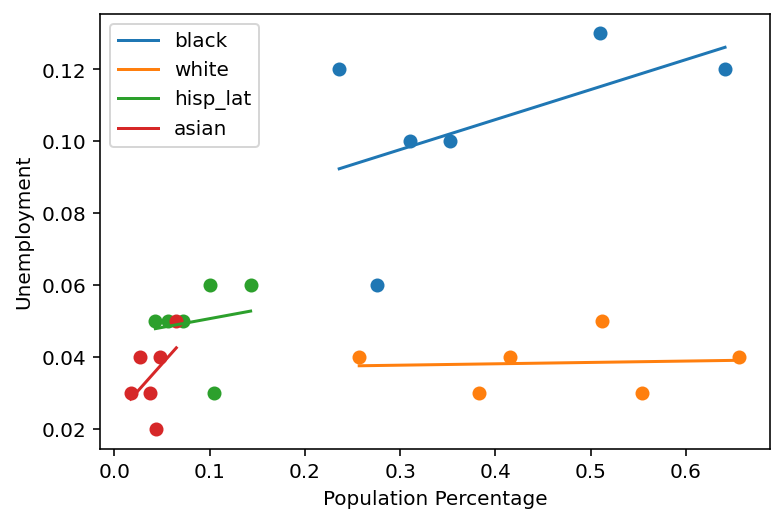

In [12]:
# Correlation plot of Unemployment and Population

correlation_plot(se_df["black  (%)"], se_df['unemployed black (%)'])

correlation_plot(se_df["white  (%)"], se_df['unemployed white (%)'])

correlation_plot(se_df["hisp_lat  (%)"], se_df['unemployed latino (%)'])

correlation_plot(se_df["asian  (%)"], se_df['unemployed asian (%)'])

plt.xlabel('Population Percentage')
plt.ylabel('Unemployment')
plt.legend(["black", "white", "hisp_lat", "asian"]);

# Income

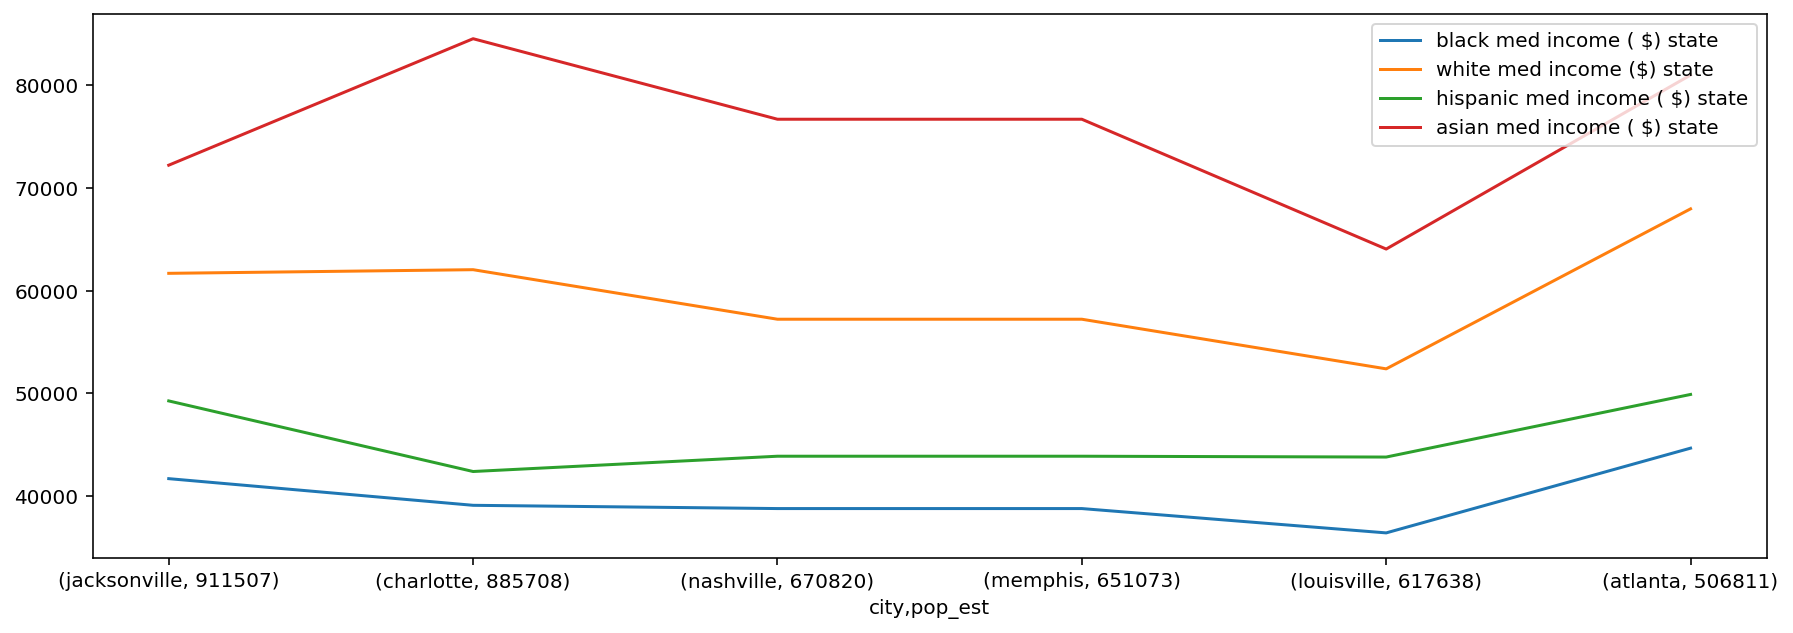

In [13]:
# Plot of median income per demographic and city sorted in ascending by largest population

med_inc_plot = se_df.groupby(["city","pop_est"])[[
    'black med income ( $) state', 'white med income ($) state',
       'hispanic med income ( $) state', 'asian med income ( $) state' 
]].sum().sort_values(by = "pop_est", ascending = False)
med_inc_plot.plot(figsize = (15,5));

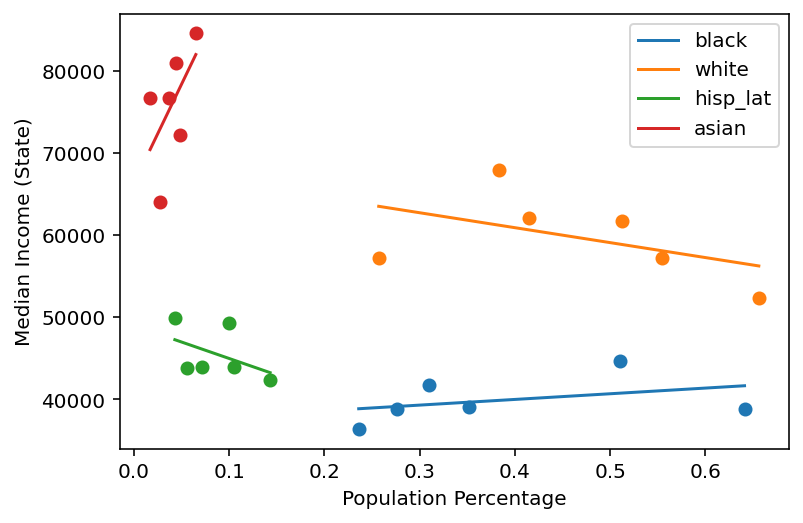

In [14]:
# Correlation plot of Median Income (State) and Population

correlation_plot(se_df["black  (%)"], se_df['black med income ( $) state'])

correlation_plot(se_df["white  (%)"], se_df['white med income ($) state'])

correlation_plot(se_df["hisp_lat  (%)"], se_df['hispanic med income ( $) state'])

correlation_plot(se_df["asian  (%)"], se_df['asian med income ( $) state'])

plt.xlabel('Population Percentage')
plt.ylabel('Median Income (State)')
plt.legend(["black", "white", "hisp_lat", "asian"]);

# Wage

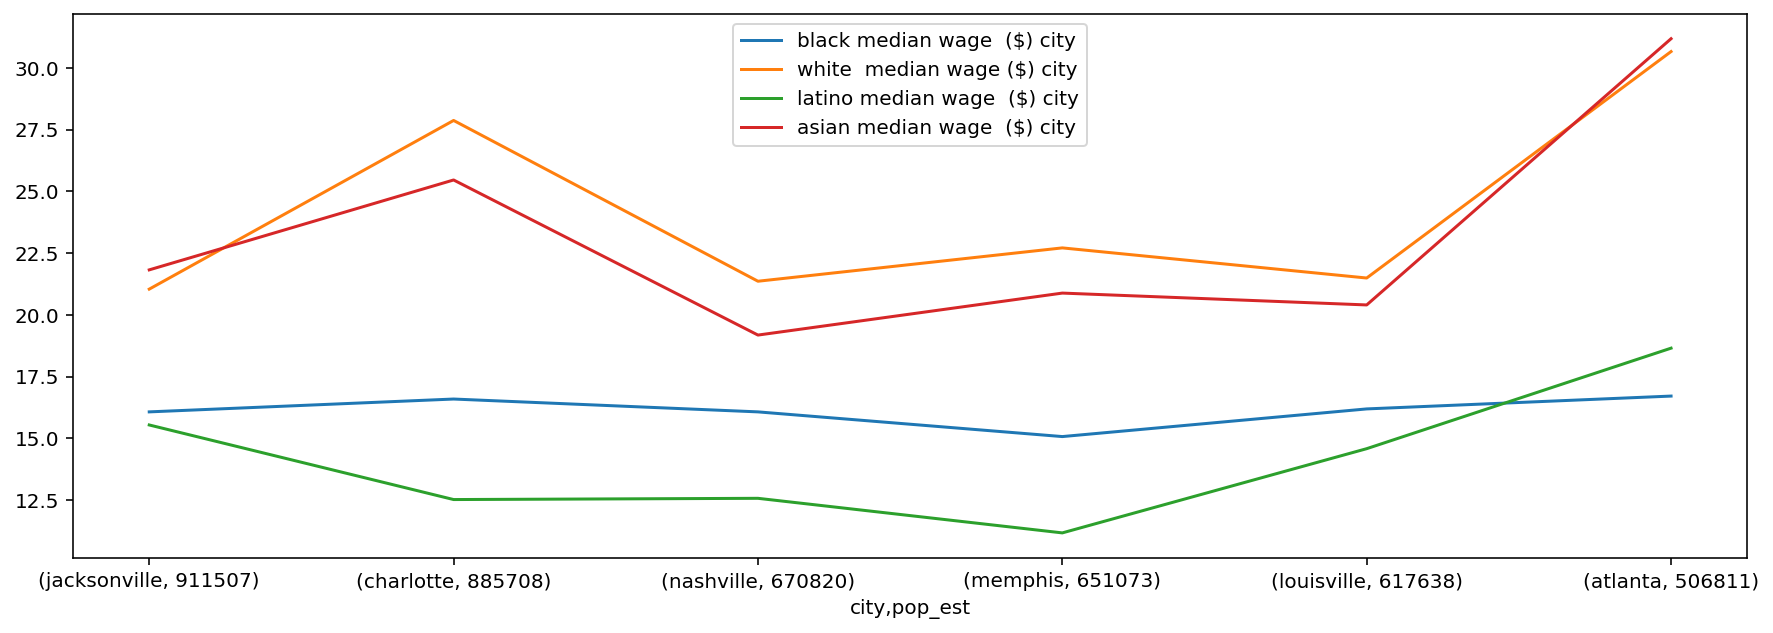

In [15]:
# Plot of median wage per demographic and city sorted in ascending by largest population

wage_plot = se_df.groupby(["city","pop_est"])[[
    'black median wage  ($) city', 'white  median wage ($) city',
       'latino median wage  ($) city', 'asian median wage  ($) city' 
]].sum().sort_values(by = "pop_est", ascending = False)
wage_plot.plot(figsize = (15,5));

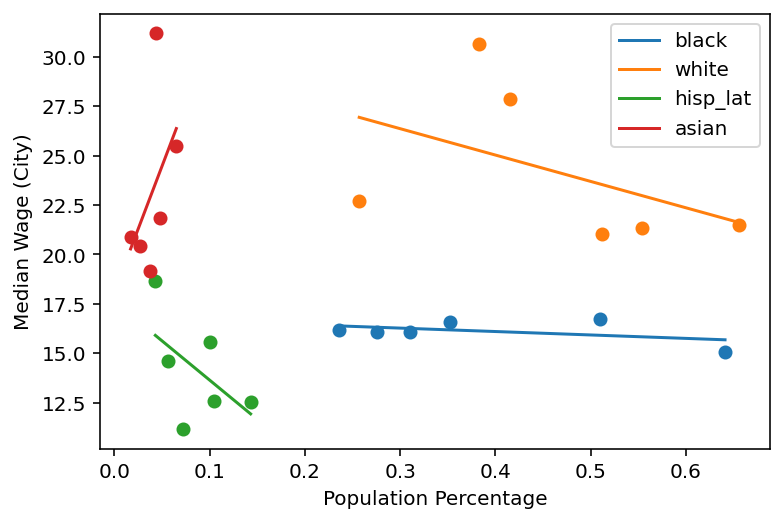

In [16]:
# Correlation plot of Median Wage (City) and Population

correlation_plot(se_df["black  (%)"], se_df['black median wage  ($) city'])

correlation_plot(se_df["white  (%)"], se_df['white  median wage ($) city'])

correlation_plot(se_df["hisp_lat  (%)"], se_df['latino median wage  ($) city'])

correlation_plot(se_df["asian  (%)"], se_df['asian median wage  ($) city'])

plt.xlabel('Population Percentage')
plt.ylabel('Median Wage (City)')
plt.legend(["black", "white", "hisp_lat", "asian"]);

# Education (BA Degree or Higher)

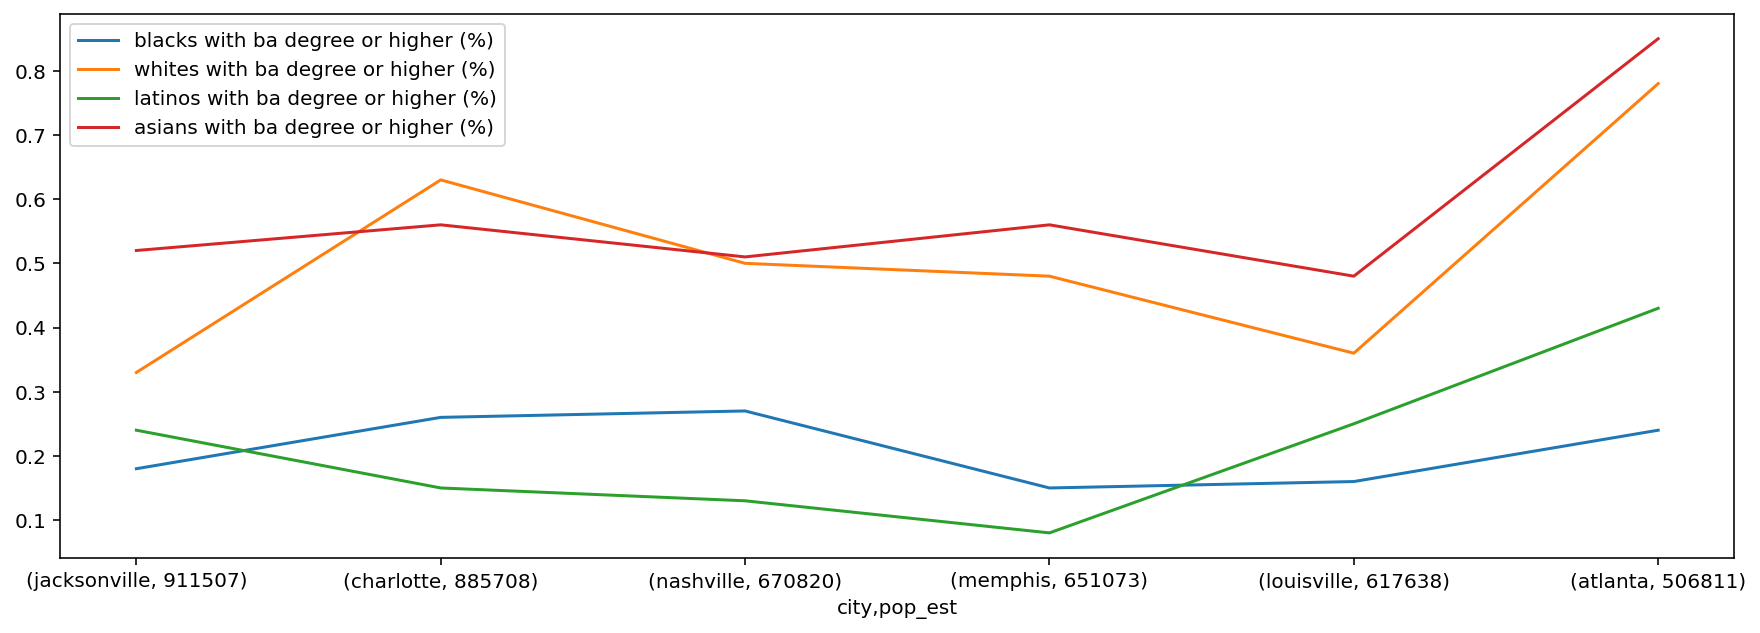

In [17]:
# Plot of BA degree or higher per demographic and city sorted in ascending by largest population

ba_plot = se_df.groupby(["city","pop_est"])[[
    'blacks with ba degree or higher (%)',
       'whites with ba degree or higher (%)',
       'latinos with ba degree or higher (%)',
       'asians with ba degree or higher (%)' 
]].sum().sort_values(by = "pop_est", ascending = False)
ba_plot.plot(figsize = (15,5));

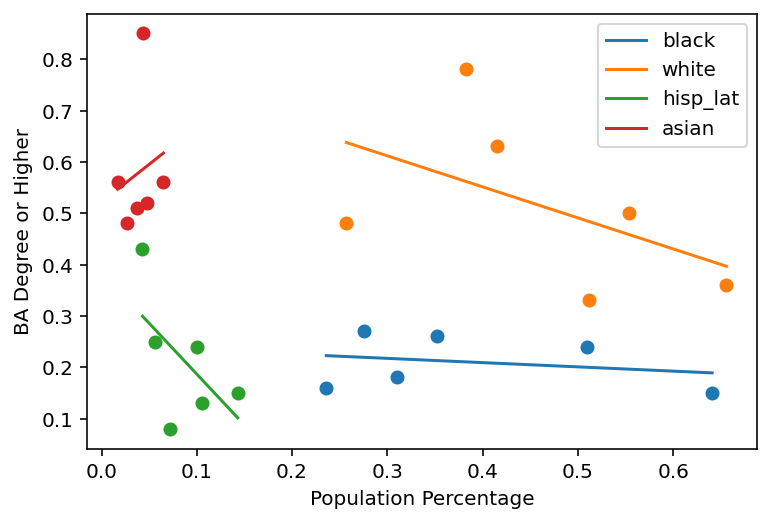

In [18]:
# Correlation plot of BA Degree or Higher and Population

correlation_plot(se_df["black  (%)"], se_df['blacks with ba degree or higher (%)'])

correlation_plot(se_df["white  (%)"], se_df['whites with ba degree or higher (%)'])

correlation_plot(se_df["hisp_lat  (%)"], se_df['latinos with ba degree or higher (%)'])

correlation_plot(se_df["asian  (%)"], se_df['asians with ba degree or higher (%)'])

plt.xlabel('Population Percentage')
plt.ylabel('BA Degree or Higher')
plt.legend(["black", "white", "hisp_lat", "asian"]);

# Education (Graduation Rate)

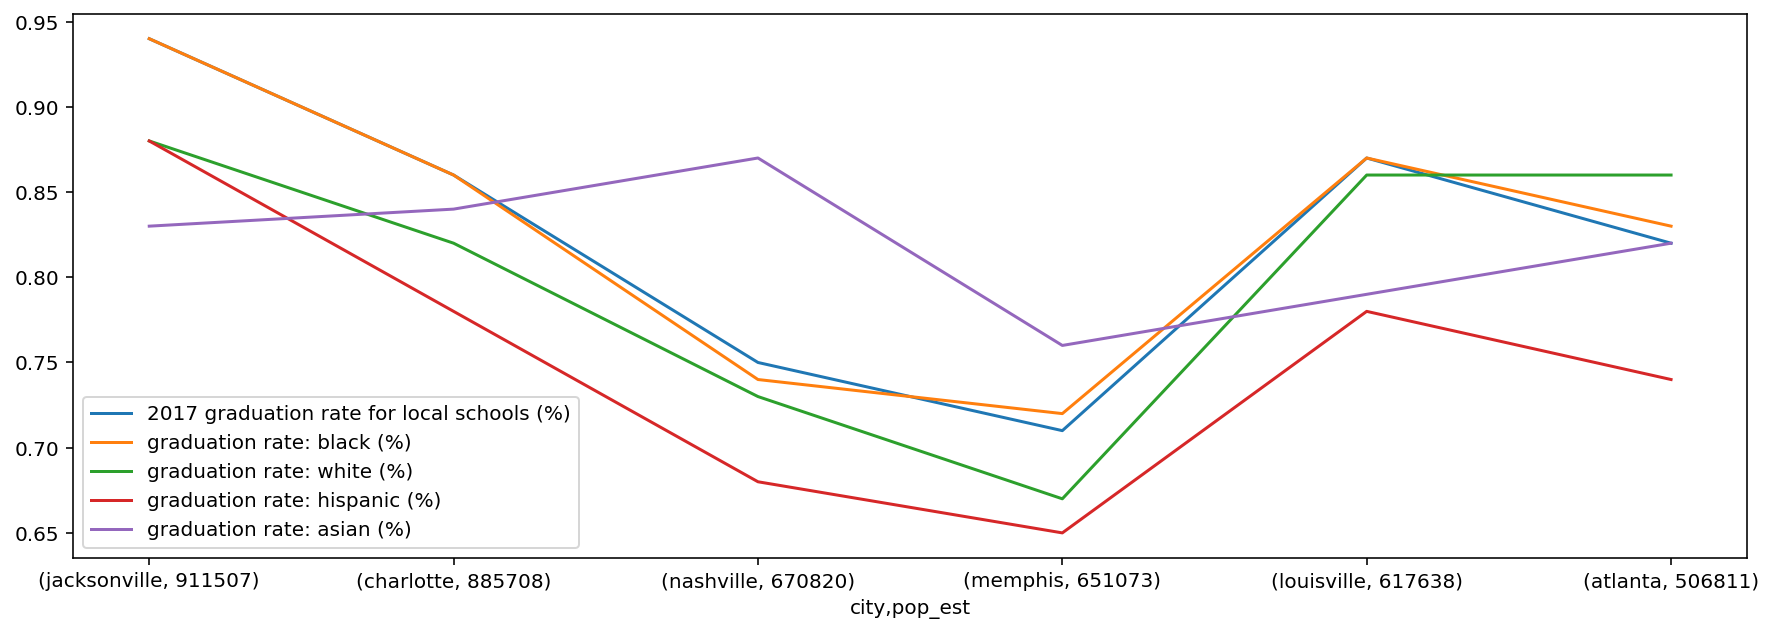

In [19]:
# Plot of graduation rate per demographic and city sorted in ascending by largest population

grad_plot = se_df.groupby(["city","pop_est"])[[
    '2017 graduation rate for local schools (%)',
       'graduation rate: black (%)', 'graduation rate: white (%)',
       'graduation rate: hispanic (%)','graduation rate: asian (%)' 
]].sum().sort_values(by = "pop_est", ascending = False)
grad_plot.plot(figsize = (15,5));

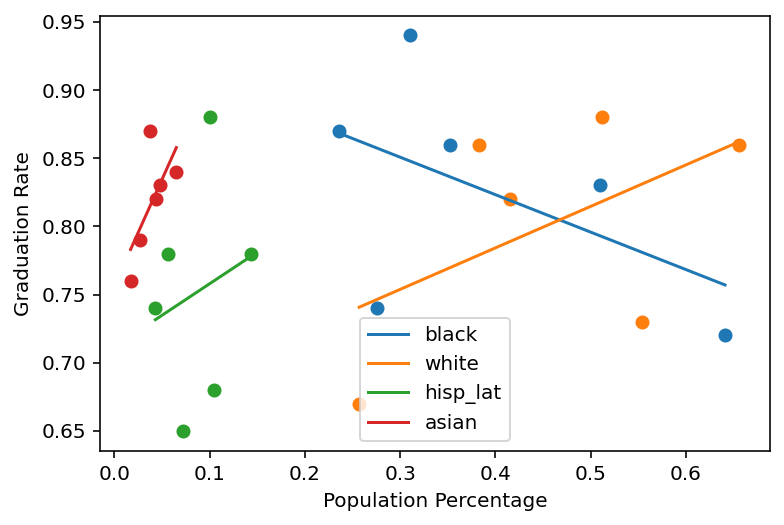

In [20]:
# Correlation plot of graduation rate and Population

correlation_plot(se_df["black  (%)"], se_df['graduation rate: black (%)'])

correlation_plot(se_df["white  (%)"], se_df['graduation rate: white (%)'])

correlation_plot(se_df["hisp_lat  (%)"], se_df['graduation rate: hispanic (%)'])

correlation_plot(se_df["asian  (%)"], se_df['graduation rate: asian (%)'])

plt.xlabel('Population Percentage')
plt.ylabel('Graduation Rate')
plt.legend(["black", "white", "hisp_lat", "asian"]);

In [21]:
se_df.columns

Index(['city', 'state', 'region', 'pop_size range', 'diversity score',
       'pop_est', 'white  (%)', 'black  (%)', 'asian  (%)', 'hisp_lat  (%)',
       'gross metro product (  billions)',
       'casual gain or loss in income (%)  ', 'unemployment rate (%)',
       'unemployed white (%)', 'unemployed black (%)', 'unemployed asian (%)',
       'unemployed latino (%)', 'living wage ( $)',
       'asian med income ( $) state', 'black med income ( $) state',
       'hispanic med income ( $) state', 'white med income ($) state',
       'black median wage  ($) city', 'white  median wage ($) city',
       'latino median wage  ($) city', 'asian median wage  ($) city',
       'blacks with ba degree or higher (%)',
       'whites with ba degree or higher (%)',
       'latinos with ba degree or higher (%)',
       'asians with ba degree or higher (%)',
       '2017 graduation rate for local schools (%)',
       'graduation rate: asian (%)', 'graduation rate: black (%)',
       'graduation rate

# Hate Crimes

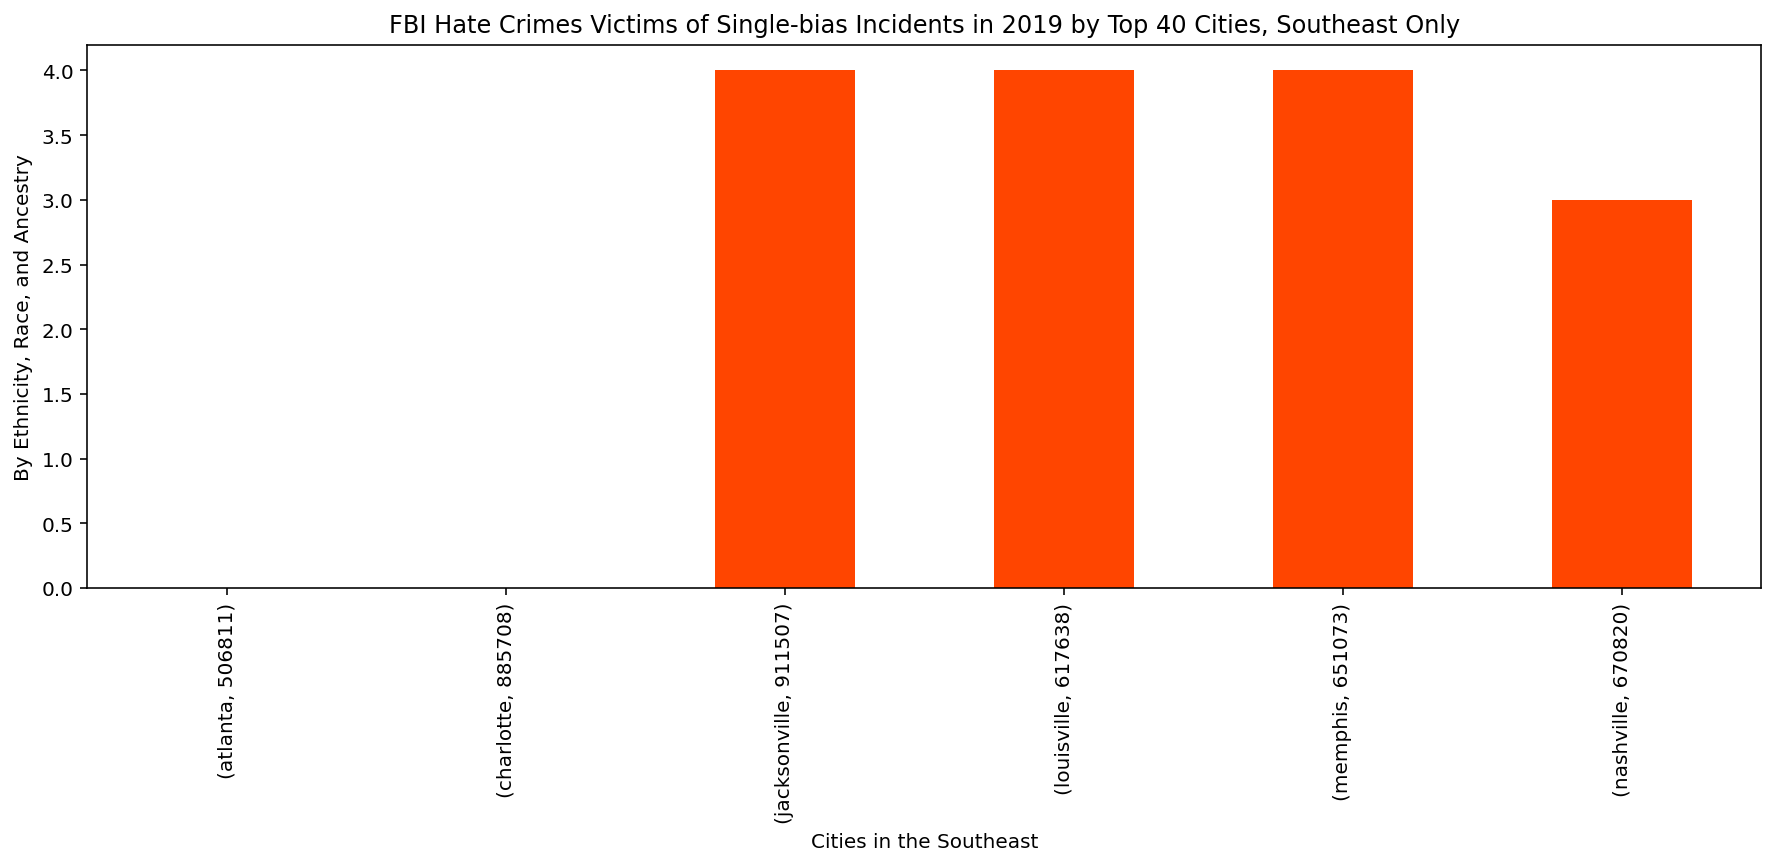

In [22]:
# FBI Hate Crimes Victims of Single-bias Incidents in 2019 by Top 40 Cities by Region

hc_city_plot = se_df.groupby(["city", "pop_est"])["victims of hate crimes "].sum()
hc_city_plot.plot.bar(color = "orangered", figsize = (15,5))
plt.xlabel("Cities in the Southeast")
plt.ylabel("By Ethnicity, Race, and Ancestry")
plt.title("FBI Hate Crimes Victims of Single-bias Incidents in 2019 by Top 40 Cities, Southeast Only");

# Political Party Majorities

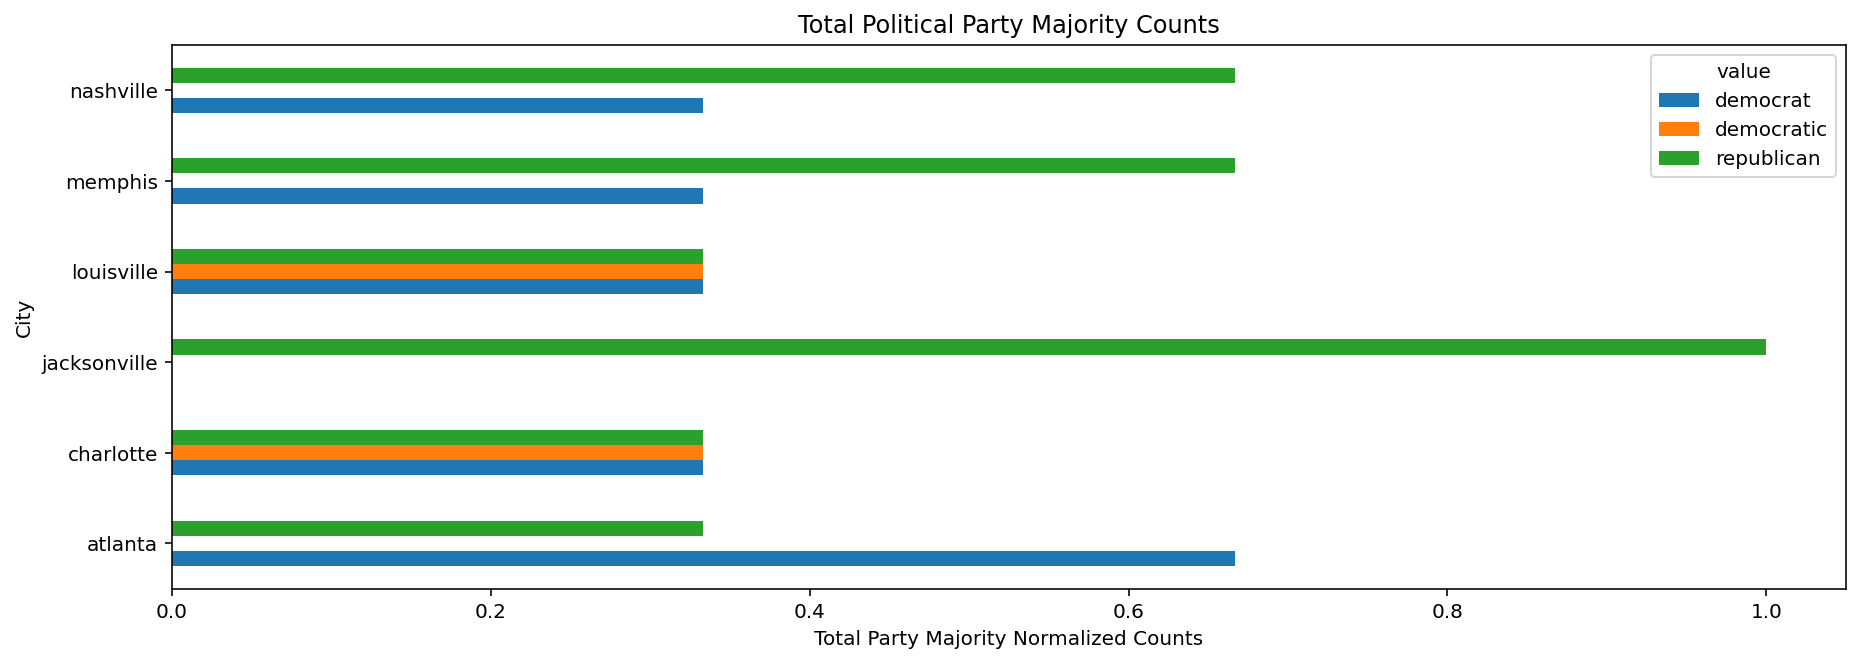

In [23]:
# Total Party Majority Counts

political = se_df[["city", 'state congress party majority',
       'mayoral political party', 'governor political party']]
political = political.melt(id_vars = ["city"], value_vars = ['state congress party majority',
       'mayoral political party', 'governor political party'])
political_gb = political.groupby("city")["value"].value_counts(normalize=True).unstack()
political_gb.plot.barh(figsize = (15,5))
plt.xlabel("Total Party Majority Normalized Counts")
plt.ylabel("City")
plt.title("Total Political Party Majority Counts");